In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\Big Mart Sales\\train.csv")
test=pd.read_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\Big Mart Sales\\test.csv")


In [3]:
print(train.shape)
print(test.shape)
train.head(50)

(8523, 12)
(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [5]:
train['Item_Identifier'].nunique()

1559

In [6]:
print(train['Outlet_Size'].nunique())
print(train['Outlet_Location_Type'].nunique())
print(train['Outlet_Type'].nunique())
print(train['Item_Type'].nunique())

3
3
4
16


In [7]:
for j in range(len(train['Item_Identifier'])):
    if 'FD' in train.loc[j,'Item_Identifier']:
        train.loc[j,'Item_Identifier']='FOOD'
    elif 'DR' in train.loc[j,'Item_Identifier']:
        train.loc[j,'Item_Identifier']='DRINK'
    elif 'NC' in train.loc[j,'Item_Identifier']:
        train.loc[j,'Item_Identifier']='NON-CONSUMABLE'

In [8]:
#train.groupby('Outlet_Establishment_Year').count()
#train.groupby(['Outlet_Establishment_Year','Outlet_Type']).Outlet_Establishment_Year.count()
train.groupby(['Outlet_Type','Outlet_Size','Outlet_Location_Type']).Outlet_Type.count()
#train[train['Outlet_Size'].isnull()].groupby(['Outlet_Location_Type','Outlet_Type']).Outlet_Location_Type.count()

Outlet_Type        Outlet_Size  Outlet_Location_Type
Grocery Store      Small        Tier 1                  528
Supermarket Type1  High         Tier 3                  932
                   Medium       Tier 1                  930
                   Small        Tier 1                  930
                                Tier 2                  930
Supermarket Type2  Medium       Tier 3                  928
Supermarket Type3  Medium       Tier 3                  935
Name: Outlet_Type, dtype: int64

In [9]:
index_to_drop=train[(train['Outlet_Location_Type']=='Tier 2') & (train['Outlet_Type']=='Supermarket Type1')].index
market=train[(train['Outlet_Location_Type']=='Tier 2') & (train['Outlet_Type']=='Supermarket Type1')]
index_to_drop

Int64Index([   8,    9,   19,   22,   25,   26,   33,   46,   47,   53,
            ...
            8501, 8502, 8503, 8507, 8508, 8510, 8513, 8514, 8519, 8520],
           dtype='int64', length=2785)

In [10]:
train=train.drop(index_to_drop)
market['Outlet_Size'].fillna('Small',inplace=True)

In [11]:
train=pd.concat([train,market],axis=0)
train.shape

(8523, 12)

In [12]:
train['Outlet_Size'].fillna('Small',inplace=True)
train.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [13]:
train.groupby(['Item_Fat_Content']).count()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
LF,316,260,316,316,316,316,316,316,316,316,316
Low Fat,5089,4222,5089,5089,5089,5089,5089,5089,5089,5089,5089
Regular,2889,2388,2889,2889,2889,2889,2889,2889,2889,2889,2889
low fat,112,84,112,112,112,112,112,112,112,112,112
reg,117,106,117,117,117,117,117,117,117,117,117


In [14]:
train.replace('low fat','Low Fat',inplace=True)
train.replace('LF','Low Fat',inplace=True)
train.replace('reg','Regular',inplace=True)
train.groupby(['Item_Fat_Content']).count()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
Low Fat,5517,4566,5517,5517,5517,5517,5517,5517,5517,5517,5517
Regular,3006,2494,3006,3006,3006,3006,3006,3006,3006,3006,3006


In [15]:
lowFat=train[train['Item_Fat_Content']=='Low Fat']
regular=train[train['Item_Fat_Content']=='Regular']
print(lowFat.shape)
regular.shape

(5517, 12)


(3006, 12)

In [16]:
regular.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,2494.000000,3006.000000,3006.000000,3006.000000,3006.000000
mean,12.711654,0.069439,141.504259,1997.867598,2224.561170
std,4.621851,0.052212,62.214786,8.363483,1721.480865
min,4.555000,0.000000,32.055800,1985.000000,33.955800
25%,8.770000,0.029650,92.221200,1987.000000,857.550400
50%,12.500000,0.058877,144.044400,1999.000000,1844.598900
75%,16.700000,0.100394,186.521400,2004.000000,3198.669650
max,21.200000,0.311090,266.888400,2009.000000,12117.560000


In [17]:
print(lowFat.count())
regular.count()

Item_Identifier              5517
Item_Weight                  4566
Item_Fat_Content             5517
Item_Visibility              5517
Item_Type                    5517
Item_MRP                     5517
Outlet_Identifier            5517
Outlet_Establishment_Year    5517
Outlet_Size                  5517
Outlet_Location_Type         5517
Outlet_Type                  5517
Item_Outlet_Sales            5517
dtype: int64


Item_Identifier              3006
Item_Weight                  2494
Item_Fat_Content             3006
Item_Visibility              3006
Item_Type                    3006
Item_MRP                     3006
Outlet_Identifier            3006
Outlet_Establishment_Year    3006
Outlet_Size                  3006
Outlet_Location_Type         3006
Outlet_Type                  3006
Item_Outlet_Sales            3006
dtype: int64

In [18]:
lowFat['Item_Weight'].fillna(lowFat['Item_Weight'].mean(),inplace=True)
regular['Item_Weight'].fillna(regular['Item_Weight'].mean(),inplace=True)
print(lowFat.count())
regular.count()

Item_Identifier              5517
Item_Weight                  5517
Item_Fat_Content             5517
Item_Visibility              5517
Item_Type                    5517
Item_MRP                     5517
Outlet_Identifier            5517
Outlet_Establishment_Year    5517
Outlet_Size                  5517
Outlet_Location_Type         5517
Outlet_Type                  5517
Item_Outlet_Sales            5517
dtype: int64


C:\Users\rahul\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Item_Identifier              3006
Item_Weight                  3006
Item_Fat_Content             3006
Item_Visibility              3006
Item_Type                    3006
Item_MRP                     3006
Outlet_Identifier            3006
Outlet_Establishment_Year    3006
Outlet_Size                  3006
Outlet_Location_Type         3006
Outlet_Type                  3006
Item_Outlet_Sales            3006
dtype: int64

In [19]:
train=pd.concat([lowFat,regular])
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FOOD,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NON-CONSUMABLE,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FOOD,12.937387,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FOOD,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
14,FOOD,16.350000,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
16,NON-CONSUMABLE,11.800000,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
18,DRINK,12.937387,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
23,FOOD,12.937387,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
27,DRINK,11.650000,Low Fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312


In [20]:
train.count()

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [21]:
train.groupby(['Outlet_Type','Outlet_Size']).Outlet_Type.count()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  High            932
                   Medium          930
                   Small          3715
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Type, dtype: int64

In [22]:
train.drop(['Outlet_Identifier'],axis=1,inplace=True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FOOD,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NON-CONSUMABLE,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
7,FOOD,12.937387,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FOOD,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [23]:
train.count()

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [24]:
train.groupby('Item_Identifier').count()
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FOOD,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NON-CONSUMABLE,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
7,FOOD,12.937387,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FOOD,11.800000,Low Fat,0.000000,Fruits and Vegetables,45.5402,1999,Medium,Tier 1,Supermarket Type1,1516.0266


In [25]:
def change(a):
    a=2013-a;
    return a;
train['Outlet_Establishment_Year']=train.Outlet_Establishment_Year.apply(change)


In [26]:
#listOFdrop=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_MRP'];
listOFdrop=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'];
itemId=pd.get_dummies(train['Item_Identifier']);
fatCont=pd.get_dummies(train['Item_Fat_Content']);
typeItem=pd.get_dummies(train['Item_Type']);
outSize=pd.get_dummies(train['Outlet_Size']);
outLocType=pd.get_dummies(train['Outlet_Location_Type']);
outLoc=pd.get_dummies(train['Outlet_Type']);
#item_MRP=pd.get_dummies(train['Item_MRP']);

In [27]:

typeItem.shape[1]

16

In [28]:
print(itemId.shape)
print(fatCont.shape)
print(typeItem.shape)
print(outSize.shape)
print(outLocType.shape)
print(outLoc.shape)
itemId=itemId.iloc[:,1:itemId.shape[1]]
fatCont=fatCont.iloc[:,1:fatCont.shape[1]]
typeItem=typeItem.iloc[:,1:typeItem.shape[1]]
outSize=outSize.iloc[:,1:outSize.shape[1]]
outLocType=outLocType.iloc[:,1:outLocType.shape[1]]
outLoc=outLoc.iloc[:,1:outLoc.shape[1]]
print(itemId.shape)
print(fatCont.shape)
print(typeItem.shape)
print(outSize.shape)
print(outLocType.shape)
print(outLoc.shape)

(8523, 3)
(8523, 2)
(8523, 16)
(8523, 3)
(8523, 3)
(8523, 4)
(8523, 2)
(8523, 1)
(8523, 15)
(8523, 2)
(8523, 2)
(8523, 3)


In [29]:
fatCont.shape

(8523, 1)

In [30]:
train=train.drop(columns=listOFdrop)
train.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300000,0.016047,249.8092,14,3735.1380
2,17.500000,0.016760,141.6180,14,2097.2700
4,8.930000,0.000000,53.8614,26,994.7052
7,12.937387,0.127470,107.7622,28,4022.7636
10,11.800000,0.000000,45.5402,14,1516.0266
14,16.350000,0.068024,196.4426,26,1977.4260
16,11.800000,0.008596,115.3492,4,1621.8888
18,12.937387,0.034238,113.2834,28,2303.6680
23,12.937387,0.057557,107.6938,28,214.3876
27,11.650000,0.019356,39.1164,26,308.9312


In [31]:
#train=pd.concat([train,itemId,fatCont,typeItem,outSize,outLocType,outLoc,item_MRP],axis=1)
train=pd.concat([train,itemId,fatCont,typeItem,outSize,outLocType,outLoc],axis=1)
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,FOOD,NON-CONSUMABLE,Regular,Breads,Breakfast,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300000,0.016047,249.8092,14,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,17.500000,0.016760,141.6180,14,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,8.930000,0.000000,53.8614,26,994.7052,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,12.937387,0.127470,107.7622,28,4022.7636,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
10,11.800000,0.000000,45.5402,14,1516.0266,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
train.shape

(8523, 30)

In [33]:
train = train.sample(frac=1).reset_index(drop=True)
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,FOOD,NON-CONSUMABLE,Regular,Breads,Breakfast,...,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,19.350000,0.039990,165.0868,14,982.7208,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,6.135000,0.115266,160.5236,11,2094.6068,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
2,6.115000,0.007055,188.6530,14,3605.3070,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,20.350000,0.150948,81.0276,26,1868.2348,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,12.711654,0.041273,91.6804,28,3858.9768,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
5,17.750000,0.111527,110.2912,11,873.5296,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
6,7.725000,0.048661,123.7414,15,121.8414,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,17.600000,0.015751,182.5976,4,1629.8784,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
8,6.650000,0.053507,150.0734,4,3563.3616,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9,14.300000,0.130390,77.2328,9,231.6984,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [34]:
X_train=train['Item_Outlet_Sales']
train.drop(['Item_Outlet_Sales'],axis=1,inplace=True);
train.shape

(8523, 29)

In [35]:
Y=X_train
Y.shape

(8523,)

In [36]:
X=train
X.shape

(8523, 29)

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=24)

In [132]:
X_train.shape

(7670, 29)

In [133]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
y_pred=regressor.predict(X_test)


In [135]:
y=[]
for i in range(0,853):
    y.append(i);

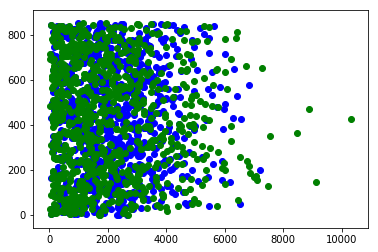

In [140]:
plt.scatter(y_pred,y,color='Blue')
plt.scatter(y_test,y,color='Green')
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt
meanSquaredError=mean_squared_error(y_test, y_pred)
sqrt(meanSquaredError)

1076.1169454532346

In [138]:
for i in range(0,10):
    print(y_test[i:i+1])
    print(y_pred[i])
    print(y_pred[i]-y_test[i:i+1])

6750    2702.4822
Name: Item_Outlet_Sales, dtype: float64
3574.005194762378
6750    871.522995
Name: Item_Outlet_Sales, dtype: float64
6045    1687.1372
Name: Item_Outlet_Sales, dtype: float64
1909.1998519037707
6045    222.062652
Name: Item_Outlet_Sales, dtype: float64
435    1727.751
Name: Item_Outlet_Sales, dtype: float64
1885.2202823536727
435    157.469282
Name: Item_Outlet_Sales, dtype: float64
4111    73.238
Name: Item_Outlet_Sales, dtype: float64
-1331.062236105835
4111   -1404.300236
Name: Item_Outlet_Sales, dtype: float64
2690    707.0796
Name: Item_Outlet_Sales, dtype: float64
638.3128707413259
2690   -68.766729
Name: Item_Outlet_Sales, dtype: float64
2944    1691.132
Name: Item_Outlet_Sales, dtype: float64
1386.734885627448
2944   -304.397114
Name: Item_Outlet_Sales, dtype: float64
6420    703.0848
Name: Item_Outlet_Sales, dtype: float64
600.04425598342
6420   -103.040544
Name: Item_Outlet_Sales, dtype: float64
7894    2528.7084
Name: Item_Outlet_Sales, dtype: float64
2334.

In [139]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor(n_estimators=300,random_state=0)
regressor1.fit(X_train,y_train)

# Predicting a new result
y_pred = regressor1.predict(X_test)